### Importaciones y configuración de rutas

In [1]:
import sys
import os
project_root = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
if project_root not in sys.path:
    sys.path.append(project_root)

import pandas as pd
import os
import gdown
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


# Importamos nuestra propia función desde la carpeta src
from src.data_utils import process_image_directory

# --- Rutas (relativas a la carpeta /notebooks) ---
RAW_DATA_PATH = '../data/raw/'
PROCESSED_DATA_PATH = '../data/processed/'

# Nos aseguramos de que los directorios de salida existan
os.makedirs(PROCESSED_DATA_PATH, exist_ok=True)

### Descarga y extracción de datos

In [2]:
# Rutas para el archivo zip y el directorio de extracción
zip_path = os.path.join(RAW_DATA_PATH, 'dataset.zip')
extracted_path = os.path.join(RAW_DATA_PATH, 'color')
file_id = "13okPy7LwT-yu4OoNjIhoz6U75ezz5hkB"

# 1. Descargar el archivo solo si no existe
if not os.path.exists(zip_path):
    print("Descargando el dataset...")
    gdown.download(f"https://drive.google.com/uc?id={file_id}", output=zip_path, quiet=False)
else:
    print("El archivo zip del dataset ya existe.")

# 2. Extraer el contenido solo si la carpeta no ha sido extraída antes
if not os.path.exists(extracted_path):
    print("Extrayendo archivos...")
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(RAW_DATA_PATH)
    print("Extracción completada.")
else:
    print("El dataset ya parece estar extraído.")

El archivo zip del dataset ya existe.
El dataset ya parece estar extraído.


### Procesamiento del directorio y creación del DataFrame

In [3]:
# La ruta correcta que contiene las 38 carpetas de clases
dataset_dir = os.path.join(RAW_DATA_PATH, 'color')

# Procesamos el directorio usando nuestra función de data_utils.py
df = process_image_directory(dataset_dir)

# Guardamos el dataframe procesado para uso futuro
df.to_csv(os.path.join(PROCESSED_DATA_PATH, 'dataframe.csv'), index=False)

print(f"DataFrame inicial creado con {len(df)} imágenes.")
print("Primeras 5 filas:")
display(df.head())

DataFrame inicial creado con 54305 imágenes.
Primeras 5 filas:


relative_path                    class  \
0  Tomato___Bacterial_spot/349e804d-2b74-4d13-8a4...  Tomato___Bacterial_spot   
1  Tomato___Bacterial_spot/022e8a4a-9297-4de3-88a...  Tomato___Bacterial_spot   
2  Tomato___Bacterial_spot/f5d9fa8d-af44-4362-913...  Tomato___Bacterial_spot   
3  Tomato___Bacterial_spot/f44c58b0-4d48-4b8b-b81...  Tomato___Bacterial_spot   
4  Tomato___Bacterial_spot/99187376-a5c2-41a7-9eb...  Tomato___Bacterial_spot   

    group             tag  
0  Tomato  Bacterial_spot  
1  Tomato  Bacterial_spot  
2  Tomato  Bacterial_spot  
3  Tomato  Bacterial_spot  
4  Tomato  Bacterial_spot

### Análisis exploratorio de datos (EDA)

Generando gráfico de distribución jerárquica de 3 niveles...


/home/adrian/proyectos_ia/VC_trabajo_integrador/src/visualization_utils.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=group_counts.index, y=group_counts.values * (100 if normalize_y_axis else 1), ax=axes[0], palette=color_map.values())
/home/adrian/proyectos_ia/VC_trabajo_integrador/src/visualization_utils.py:92: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), ha='right')
/home/adrian/proyectos_ia/VC_trabajo_integrador/src/visualization_utils.py:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tag_counts_sorted.index, y=tag_counts_sorted.values * 

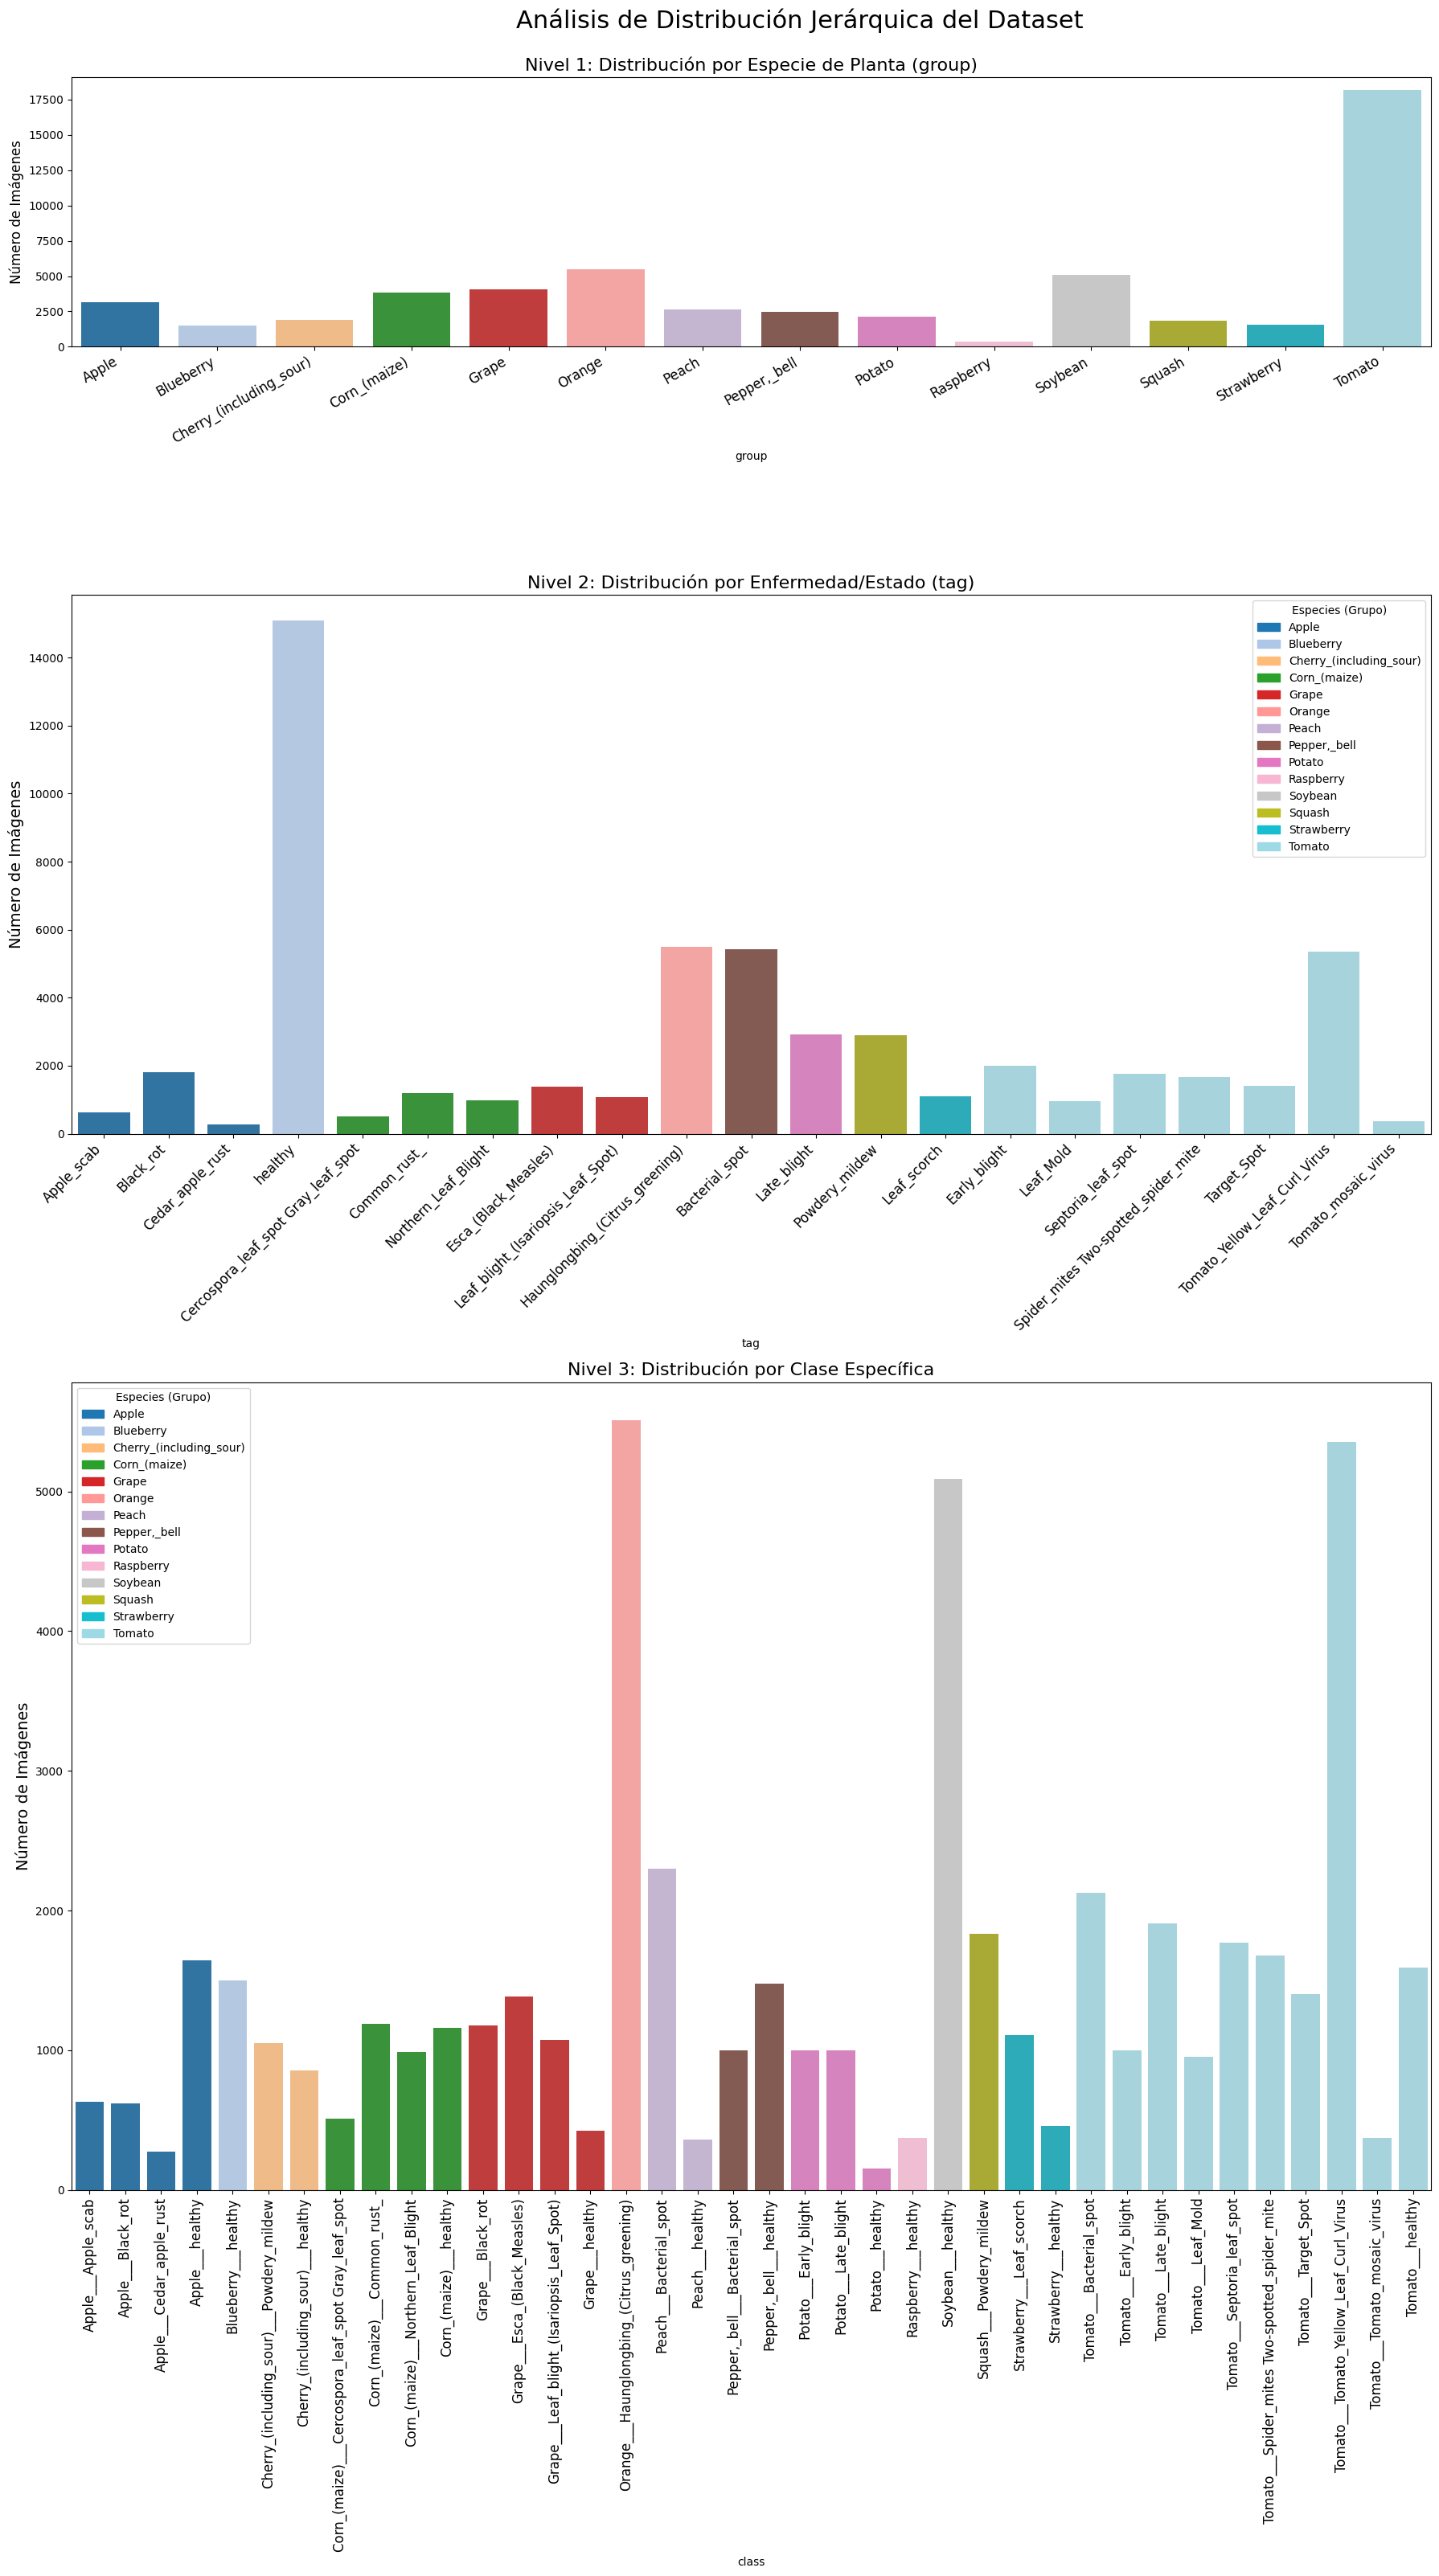

In [4]:
from src.visualization_utils import plot_full_hierarchical_distribution
plot_full_hierarchical_distribution(df)

Generando distribución de 'class' por 'group'...


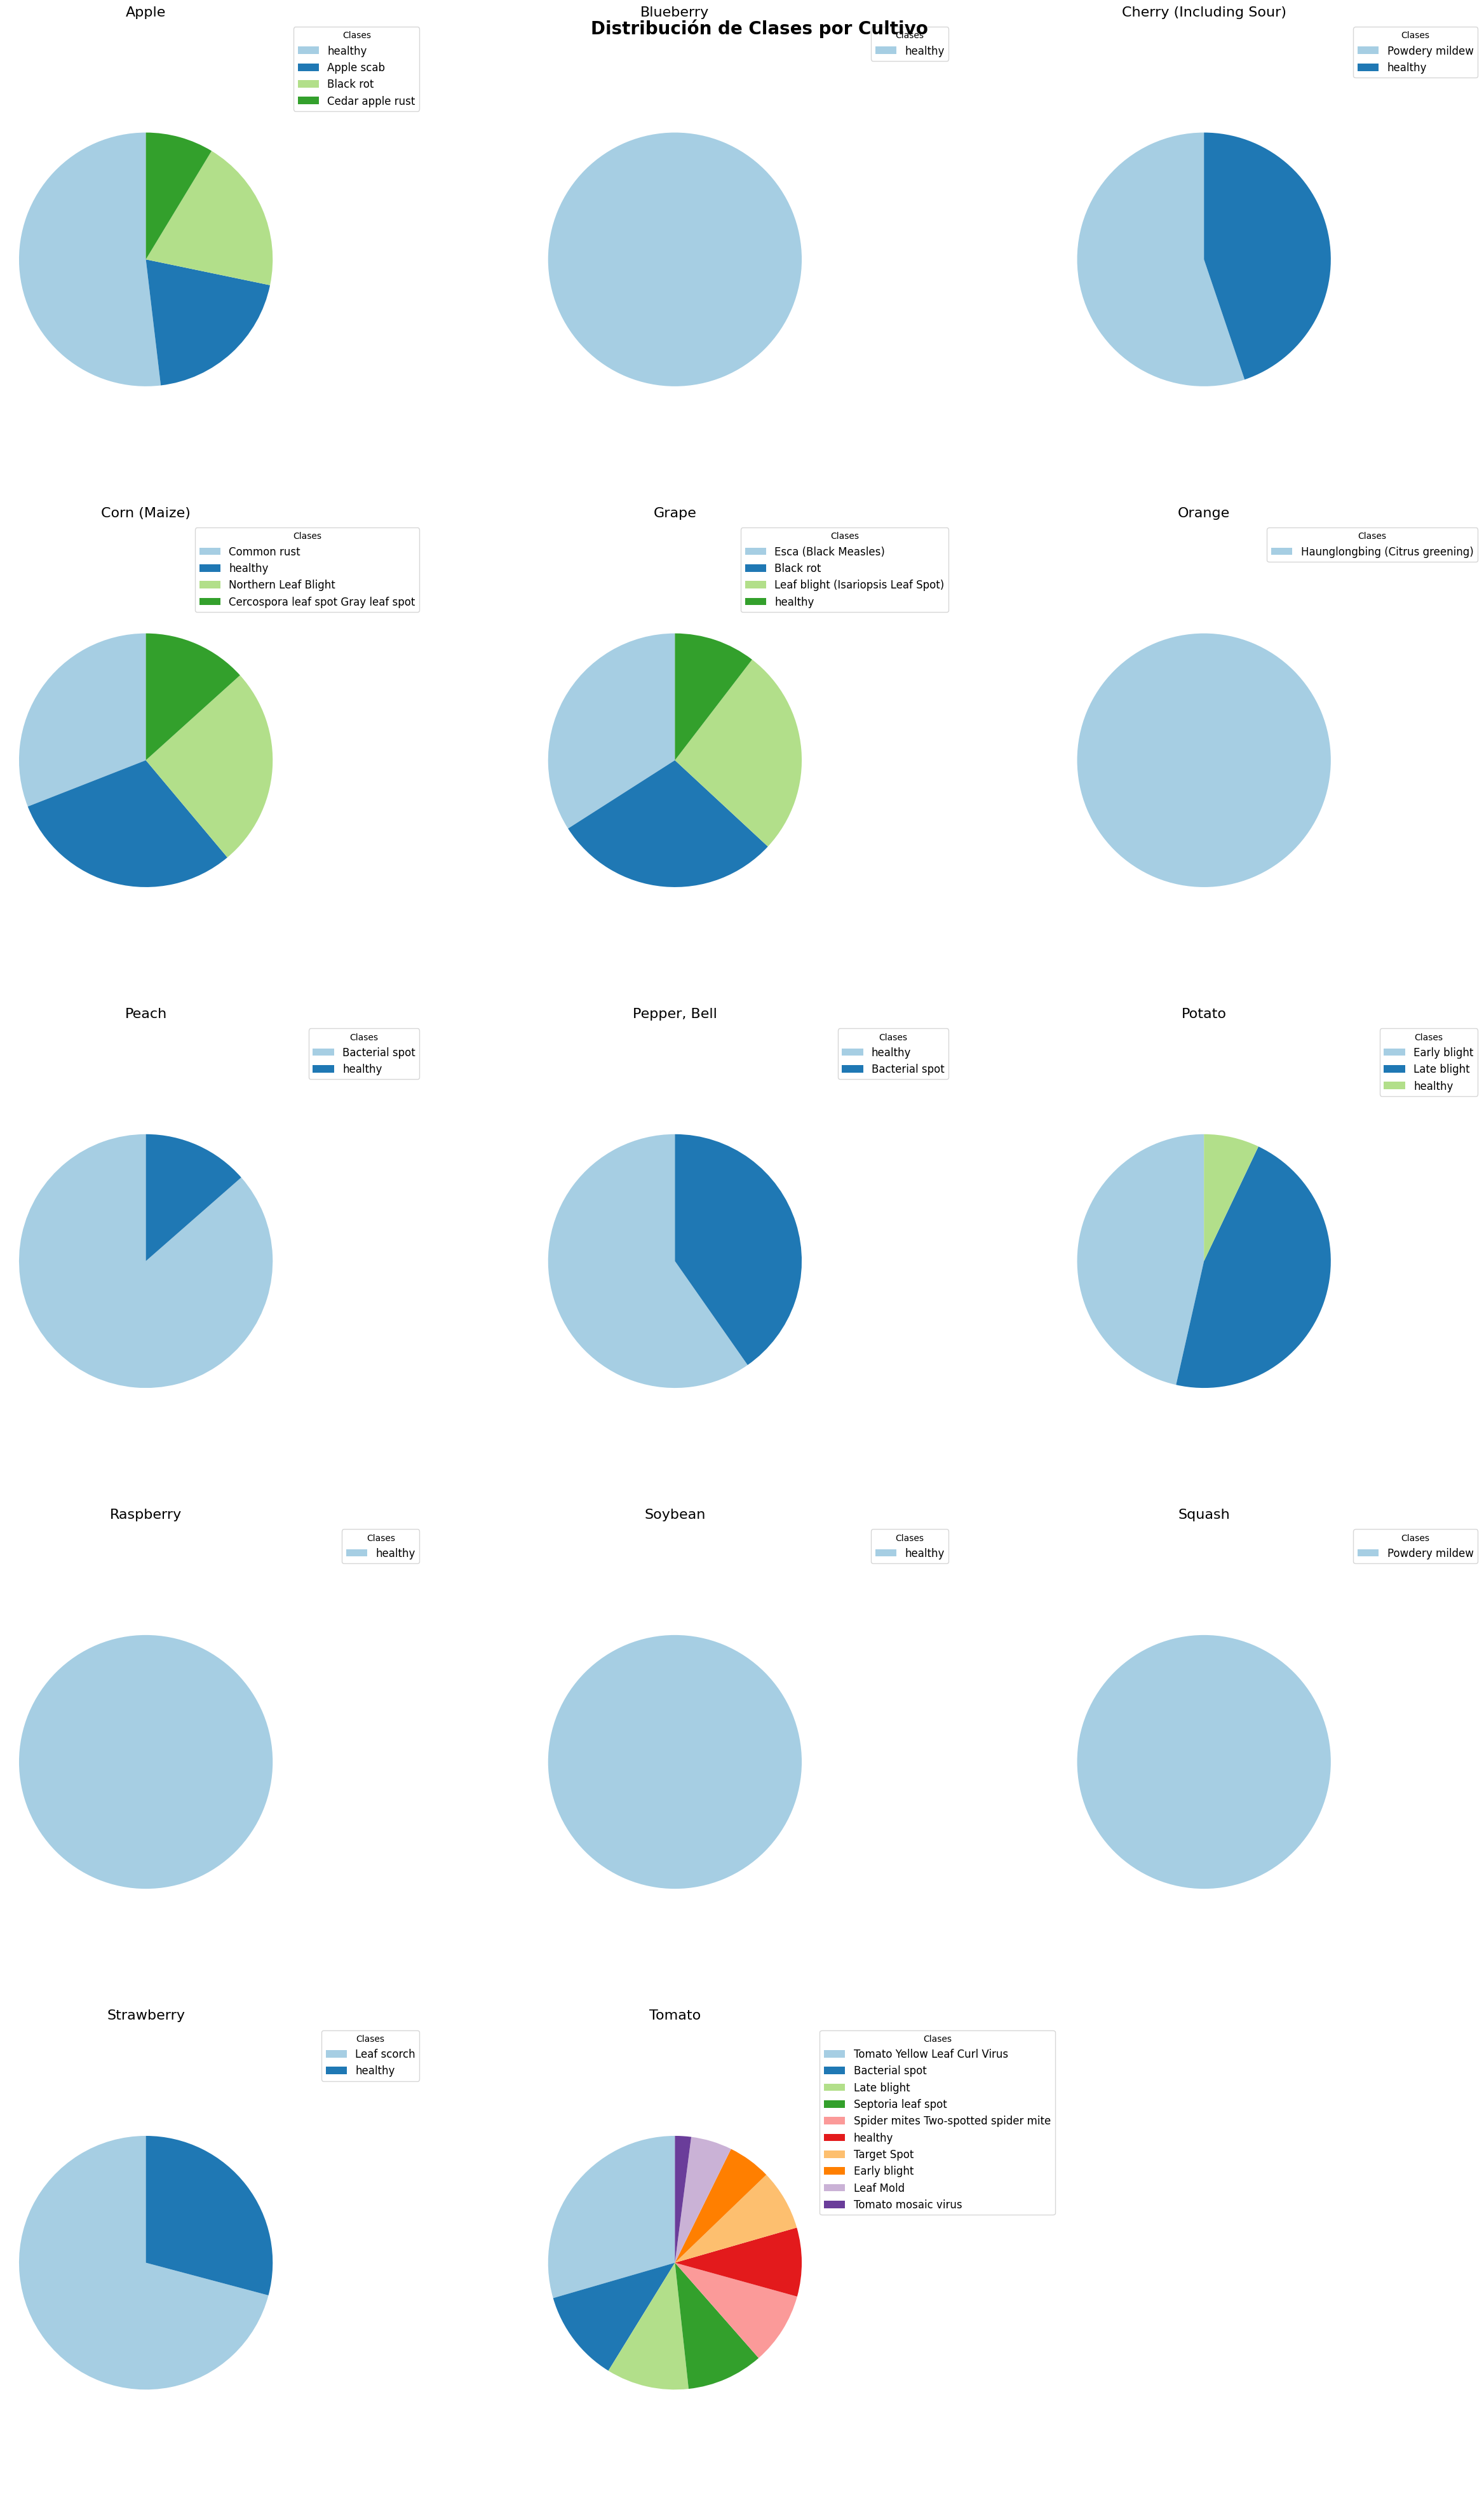

In [5]:
from src.visualization_utils import pie_graph
pie_graph(df, crop_col='group', class_col='class')

#### Ejemplos

Mostrando una grilla aleatoria de 25 imágenes del dataset:


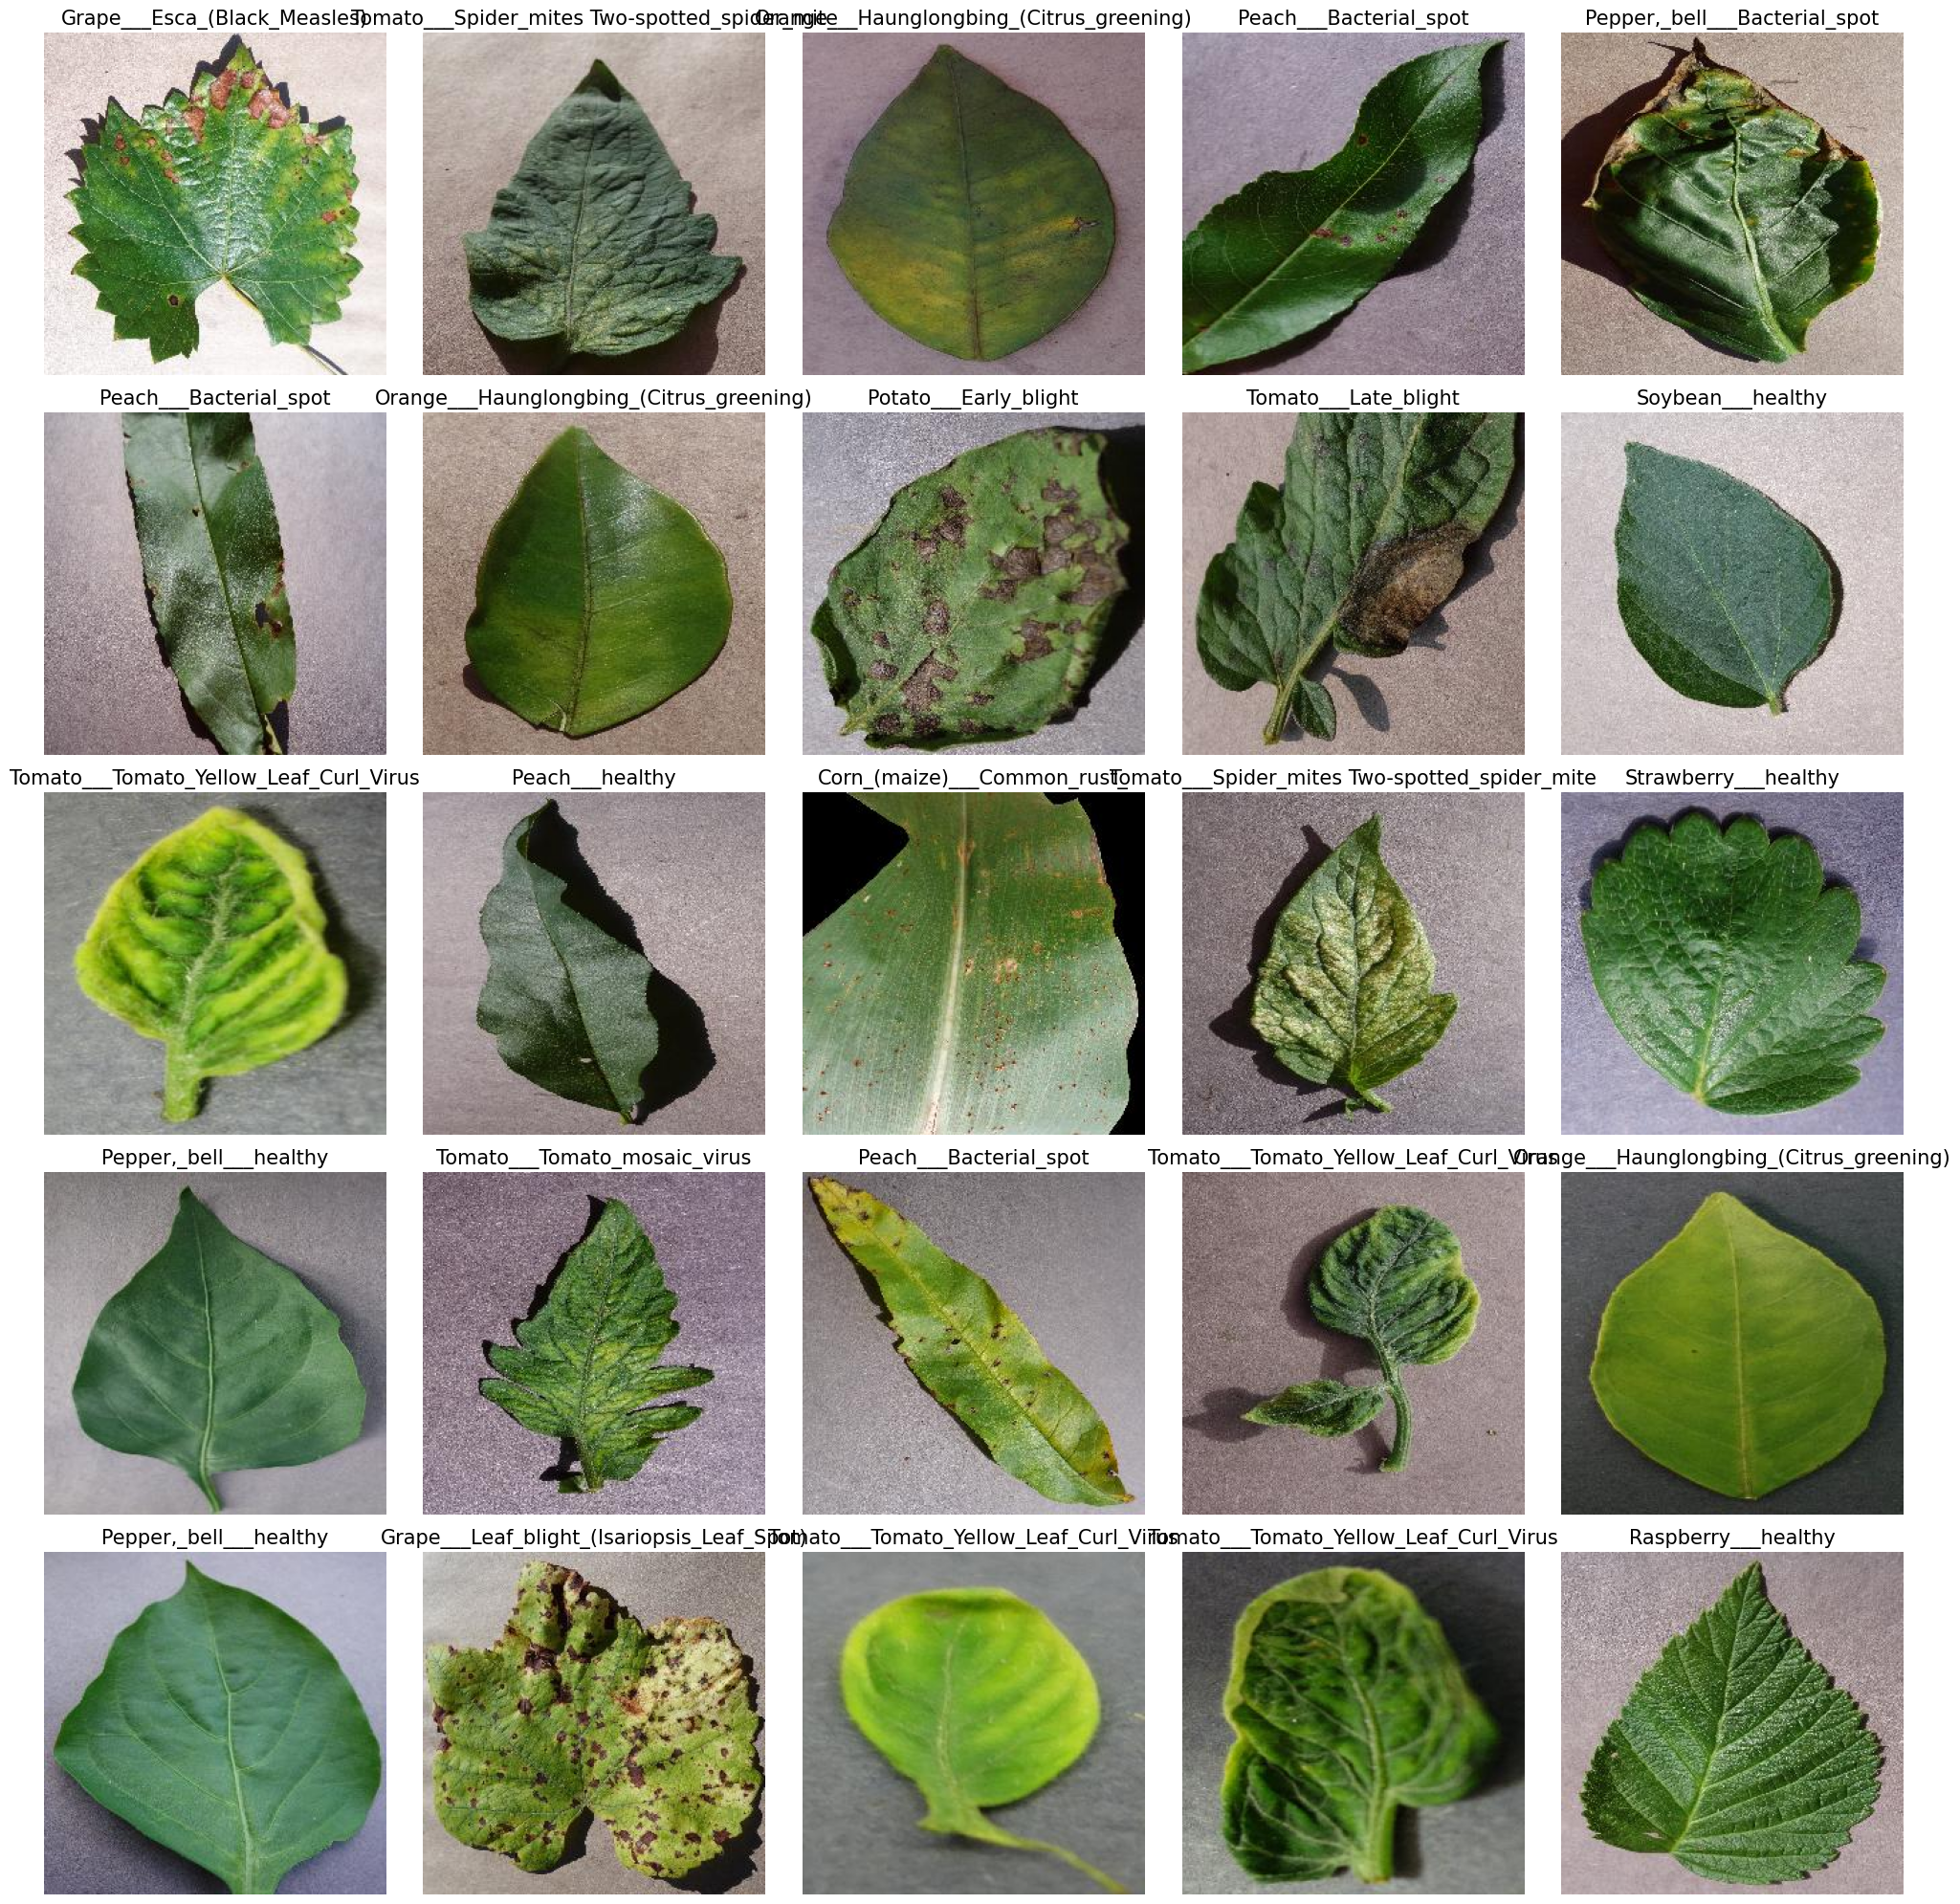

In [6]:
from src.data_utils import process_image_directory
from src.visualization_utils import plot_image_grid

print(f"Mostrando una grilla aleatoria de {5*5} imágenes del dataset:")
plot_image_grid(df, root_dir=dataset_dir, n_rows=5, n_cols=5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54305 entries, 0 to 54304
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   relative_path  54305 non-null  object
 1   class          54305 non-null  object
 2   group          54305 non-null  object
 3   tag            54305 non-null  object
dtypes: object(4)
memory usage: 1.7+ MB


In [8]:
### Resumen distribucion por grupo
print("Conteo por grupo:")
print(df['group'].value_counts())

Conteo por grupo:
group
Tomato                     18160
Orange                      5507
Soybean                     5090
Grape                       4062
Corn_(maize)                3852
Apple                       3171
Peach                       2657
Pepper,_bell                2475
Potato                      2152
Cherry_(including_sour)     1906
Squash                      1835
Strawberry                  1565
Blueberry                   1502
Raspberry                    371
Name: count, dtype: int64


In [9]:
### Resumen distribucion por grupo
print("Conteo por grupo:")
print(df['class'].value_counts())

Conteo por grupo:
class
Orange___Haunglongbing_(Citrus_greening)              5507
Tomato___Tomato_Yellow_Leaf_Curl_Virus                5357
Soybean___healthy                                     5090
Peach___Bacterial_spot                                2297
Tomato___Bacterial_spot                               2127
Tomato___Late_blight                                  1909
Squash___Powdery_mildew                               1835
Tomato___Septoria_leaf_spot                           1771
Tomato___Spider_mites Two-spotted_spider_mite         1676
Apple___healthy                                       1645
Tomato___healthy                                      1591
Blueberry___healthy                                   1502
Pepper,_bell___healthy                                1478
Tomato___Target_Spot                                  1404
Grape___Esca_(Black_Measles)                          1383
Corn_(maize)___Common_rust_                           1192
Grape___Black_rot               

In [10]:
df.describe()

relative_path  \
count                                               54305   
unique                                              54305   
top     Apple___Black_rot/86110fa2-5836-43ed-856e-9a5f...   
freq                                                    1   

                                           class   group      tag  
count                                      54305   54305    54305  
unique                                        38      14       21  
top     Orange___Haunglongbing_(Citrus_greening)  Tomato  healthy  
freq                                        5507   18160    15084

### Firmas espectrales en RGB

In [11]:
from src.data_utils import calculate_average_histograms_by_category
from src.visualization_utils import plot_spectral_signatures

def build_image_path(row, root_dir):
    return os.path.join(root_dir, row["relative_path"])

if 'full_path' not in df.columns:
    df['full_path'] = df.apply(lambda row: build_image_path(row, dataset_dir), axis=1) # Usamos dataset_dir de la celda de carga

#### Hojas Sanas vs. No Sanas

Calculando histogramas promedio por 'label_binaria'...
  - Categoría 'No Sana': 100 imágenes procesadas.
  - Categoría 'Sana': 100 imágenes procesadas.


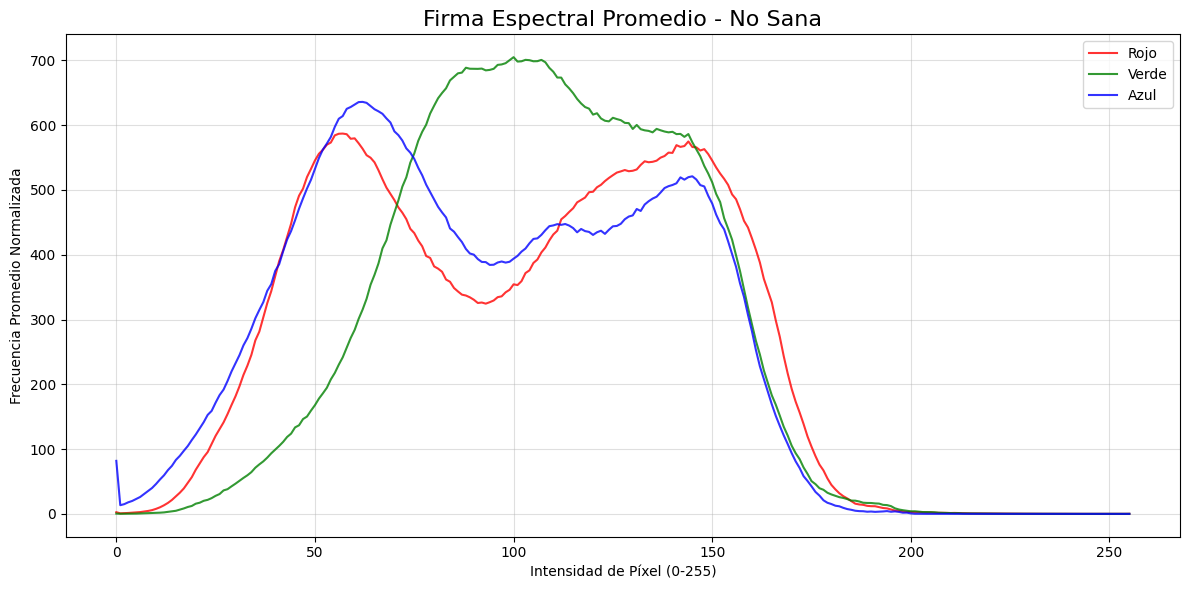

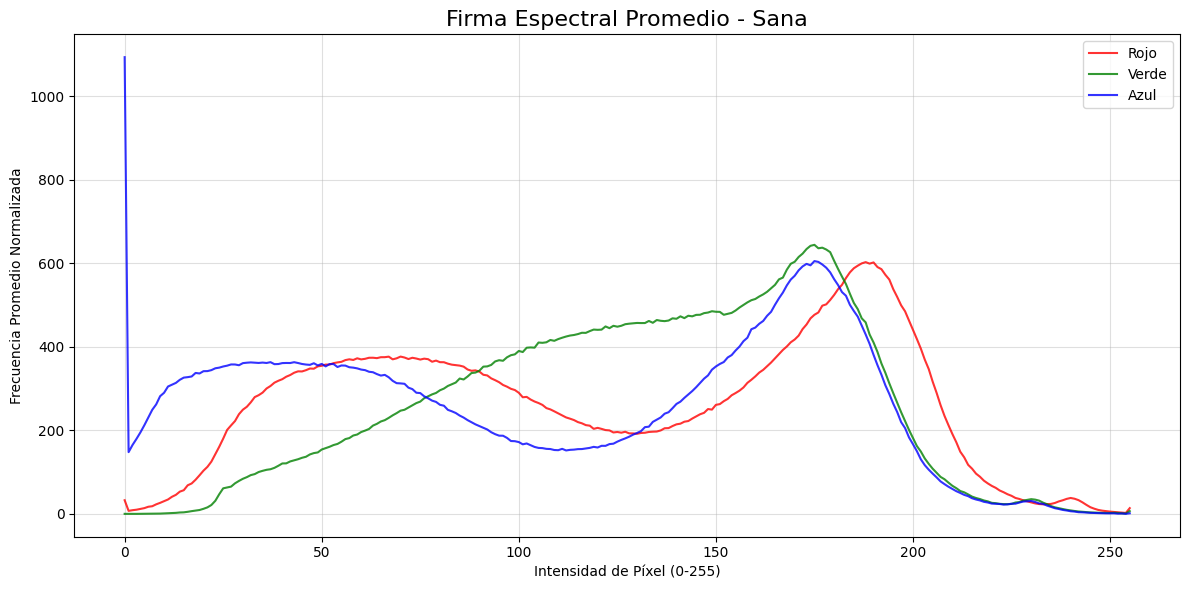

In [12]:
df['label_binaria'] = df['tag'].apply(lambda x: 'Sana' if 'healthy' in x else 'No Sana')

hist_binary_df = calculate_average_histograms_by_category(
    df, 
    root_dir=dataset_dir, 
    category_col='label_binaria',
    max_images_per_category=100 # Aumenta este número para más precisión, o None para todas
)

plot_spectral_signatures(hist_binary_df, title_prefix="Firma Espectral Promedio")

#### Comparativa entre clases específicas

Calculando histogramas promedio por 'class'...
  - Categoría 'Grape___Black_rot': 50 imágenes procesadas.
  - Categoría 'Grape___healthy': 50 imágenes procesadas.
  - Categoría 'Tomato___Bacterial_spot': 50 imágenes procesadas.
  - Categoría 'Tomato___Late_blight': 50 imágenes procesadas.
  - Categoría 'Tomato___healthy': 50 imágenes procesadas.


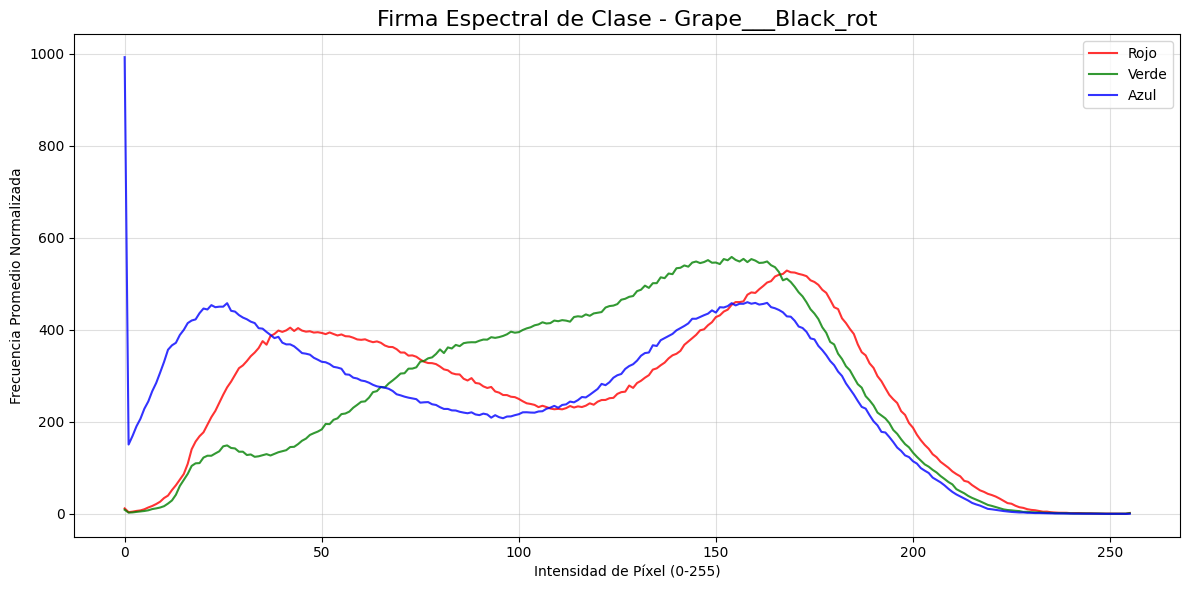

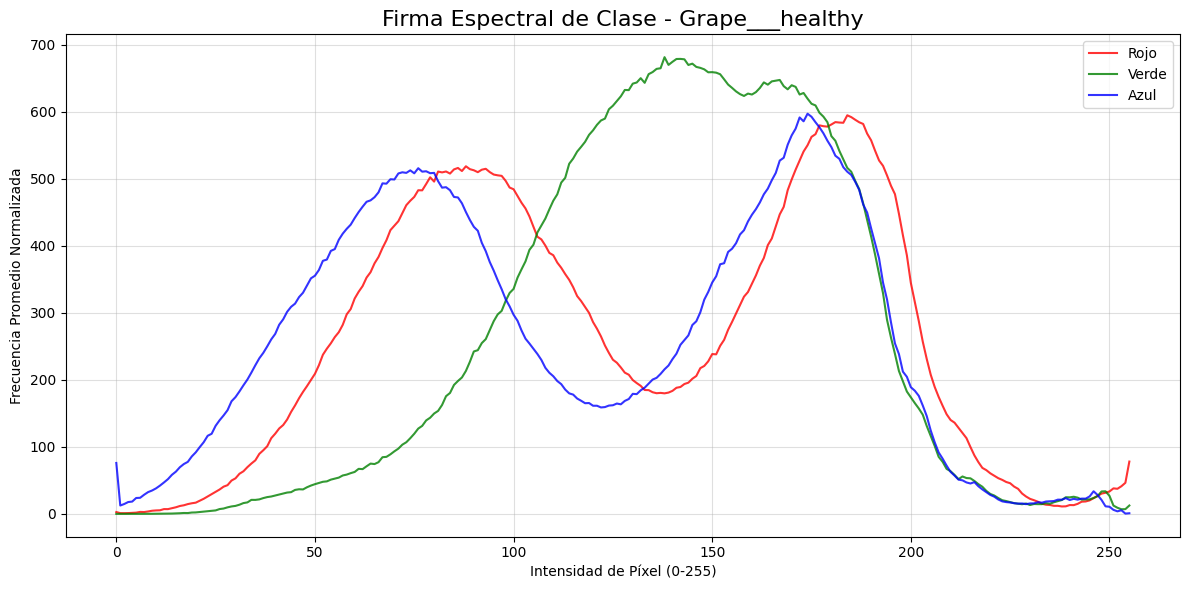

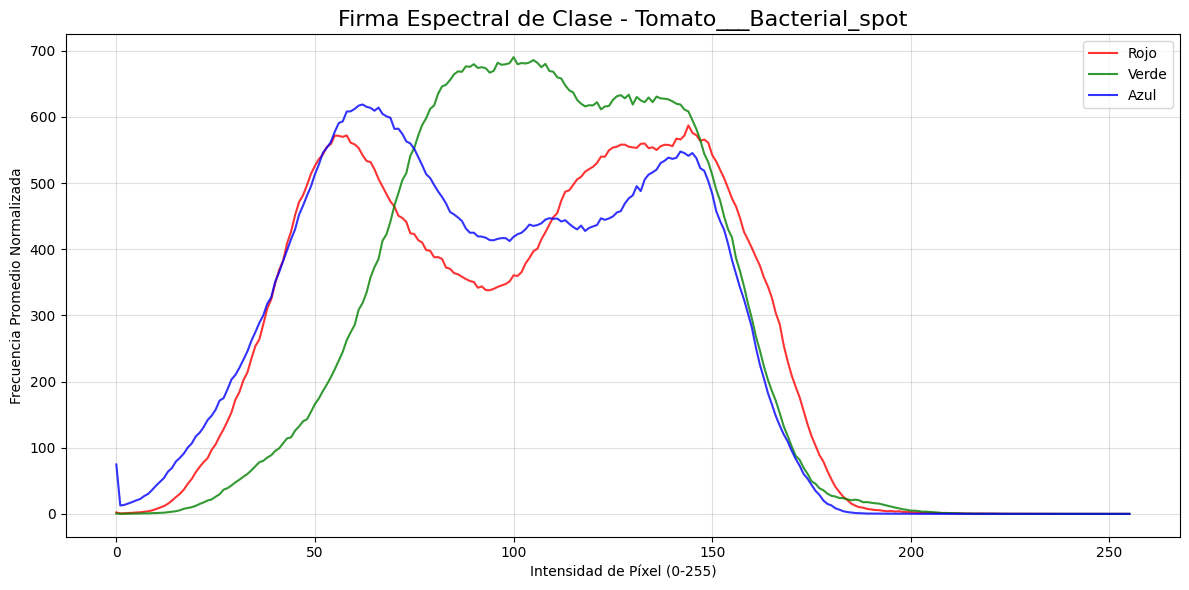

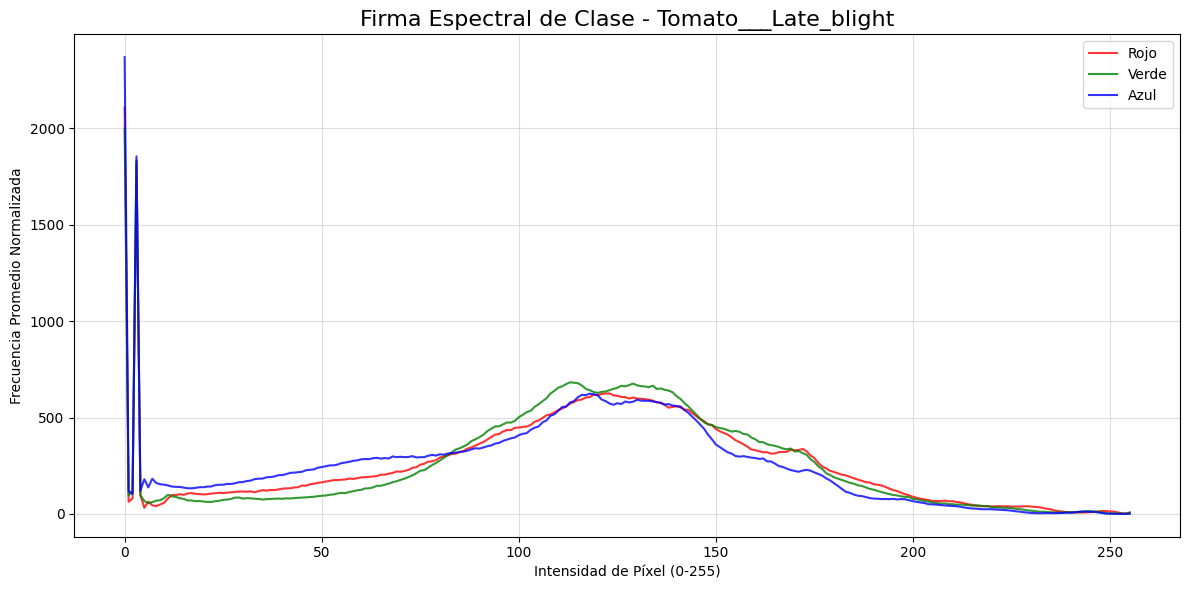

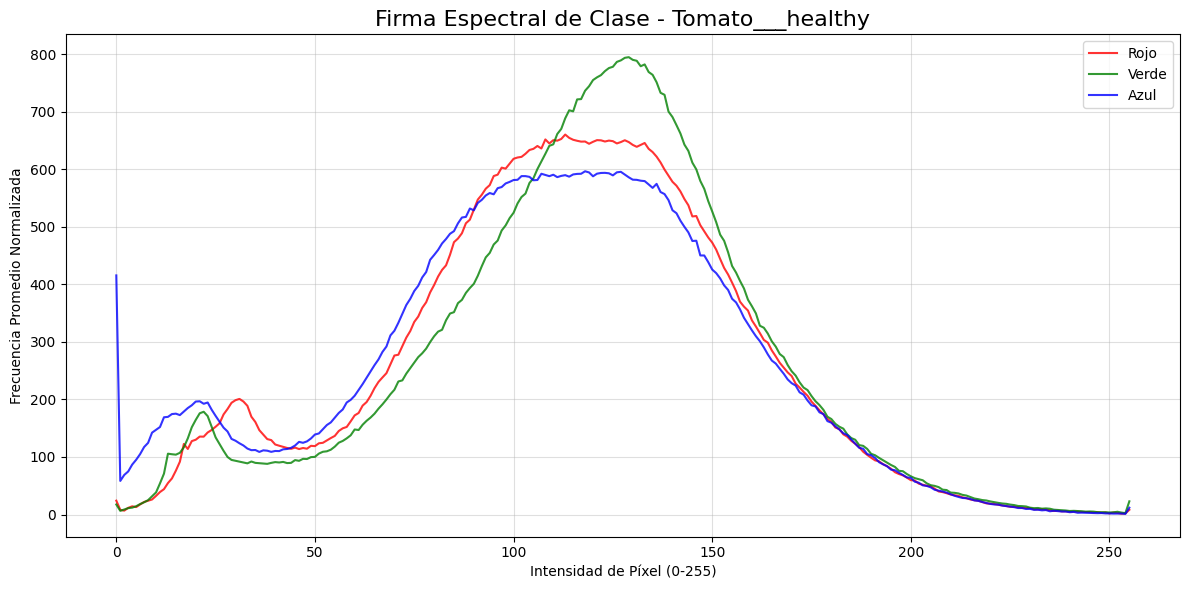

In [13]:
classes_to_compare = [
    'Tomato___healthy',
    'Tomato___Late_blight',
    'Tomato___Bacterial_spot',
    'Grape___healthy',
    'Grape___Black_rot'
]

df_subset = df[df['class'].isin(classes_to_compare)]


hist_class_df = calculate_average_histograms_by_category(
    df_subset,
    root_dir=dataset_dir,
    category_col='class',
    max_images_per_category=50
)

plot_spectral_signatures(hist_class_df, title_prefix="Firma Espectral de Clase")

## Split dataset

Vamos a dividir en 70% train, 10% test y 10% de validación
La división se hará estratificada por la columna 'class' para mantener el balance de las 38 clases en cada conjunto.

In [14]:
from src.data_utils import split_data
df_splitted = split_data(
    df.copy(),  # Usamos una copia para no alterar el dataframe original
    target_column='class',
    test_size=0.2,
    validation_size=0.1,
    random_state=42)

display(df_splitted.head())

División completada y estratificada por 'class':
  - Train:      70.0%
  - Validation: 10.0%
  - Test:       20.0%


relative_path                    class  \
0  Tomato___Bacterial_spot/349e804d-2b74-4d13-8a4...  Tomato___Bacterial_spot   
1  Tomato___Bacterial_spot/022e8a4a-9297-4de3-88a...  Tomato___Bacterial_spot   
2  Tomato___Bacterial_spot/f5d9fa8d-af44-4362-913...  Tomato___Bacterial_spot   
3  Tomato___Bacterial_spot/f44c58b0-4d48-4b8b-b81...  Tomato___Bacterial_spot   
4  Tomato___Bacterial_spot/99187376-a5c2-41a7-9eb...  Tomato___Bacterial_spot   

    group             tag                                          full_path  \
0  Tomato  Bacterial_spot  ../data/raw/color/Tomato___Bacterial_spot/349e...   
1  Tomato  Bacterial_spot  ../data/raw/color/Tomato___Bacterial_spot/022e...   
2  Tomato  Bacterial_spot  ../data/raw/color/Tomato___Bacterial_spot/f5d9...   
3  Tomato  Bacterial_spot  ../data/raw/color/Tomato___Bacterial_spot/f44c...   
4  Tomato  Bacterial_spot  ../data/raw/color/Tomato___Bacterial_spot/9918...   

  label_binaria  split  
0       No Sana   test  
1       No Sana  train  
2       No Sana   test  
3       No Sana  valid  
4       No Sana  train

In [15]:
# --- Verificación de la División ---

print("\n--- Conteo de muestras por conjunto ---")
print(df_splitted['split'].value_counts())

print("\n--- Proporción de muestras por conjunto ---")
print(df_splitted['split'].value_counts(normalize=True))

print("\n\n--- VERIFICACIÓN DEL BALANCE ESTRATIFICADO ---")
print("Se comprueba si la proporción de cada clase es similar en todos los conjuntos.")

stratification_check = df_splitted.groupby('split')['class'].value_counts(normalize=True)

# Mostramos la proporción de una clase ejemplo en cada split
print("\nEjemplo con la clase 'Apple___healthy':")
print(stratification_check.loc[:, 'Apple___healthy'])

# Puedes verificar visualmente que los porcentajes son muy similares
print("\nDistribución de clases para cada conjunto:")
display(stratification_check.to_frame())


--- Conteo de muestras por conjunto ---
split
train    38013
test     10861
valid     5431
Name: count, dtype: int64

--- Proporción de muestras por conjunto ---
split
train    0.699991
test     0.200000
valid    0.100009
Name: proportion, dtype: float64


--- VERIFICACIÓN DEL BALANCE ESTRATIFICADO ---
Se comprueba si la proporción de cada clase es similar en todos los conjuntos.

Ejemplo con la clase 'Apple___healthy':
split
test     0.030292
train    0.030279
valid    0.030381
Name: proportion, dtype: float64

Distribución de clases para cada conjunto:


proportion
split class                                               
test  Orange___Haunglongbing_(Citrus_greening)    0.101464
      Tomato___Tomato_Yellow_Leaf_Curl_Virus      0.098610
      Soybean___healthy                           0.093730
      Peach___Bacterial_spot                      0.042353
      Tomato___Bacterial_spot                     0.039131
...                                                    ...
valid Raspberry___healthy                         0.006813
      Tomato___Tomato_mosaic_virus                0.006813
      Peach___healthy                             0.006629
      Apple___Cedar_apple_rust                    0.004971
      Potato___healthy                            0.002762

[114 rows x 1 columns]

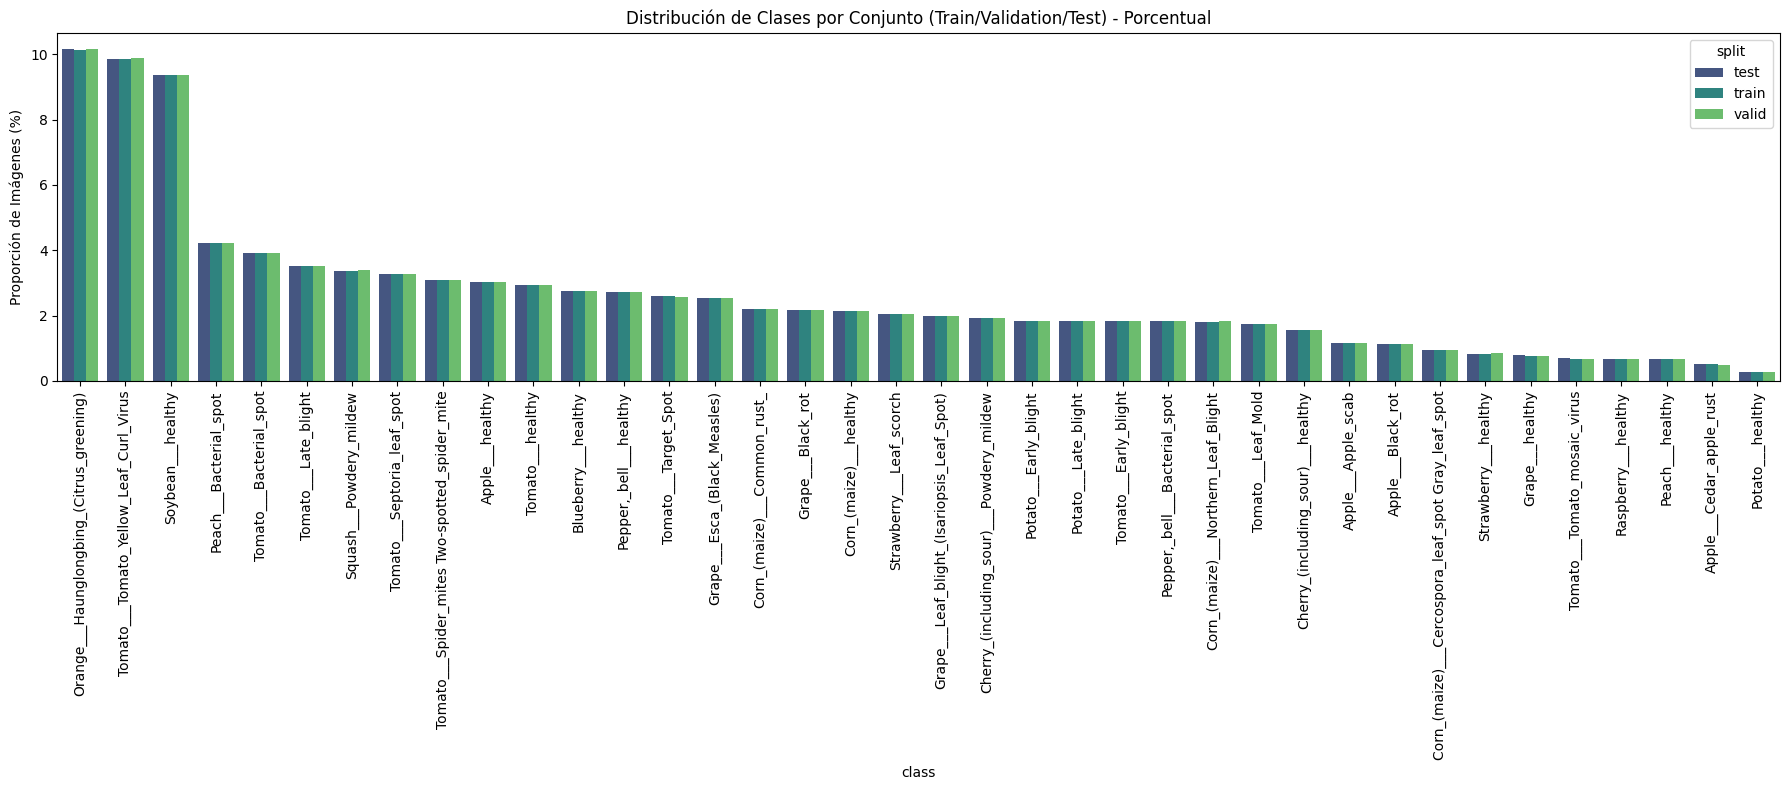

In [16]:
# En 1 Exploracion y Split.ipynb
from src.visualization_utils import plot_full_hierarchical_distribution, plot_distribution

plot_distribution(df_splitted, column='class', hue_column='split', 
                  title='Distribución de Clases por Conjunto (Train/Validation/Test) - Porcentual', 
                  normalize=True, rotation=90)

In [17]:
os.makedirs(PROCESSED_DATA_PATH, exist_ok=True)
df_splitted.to_csv(os.path.join(PROCESSED_DATA_PATH, 'dataframe_splitted.csv'), index=False)

print(f"DataFrame dividido 'dataframe_splitted.csv' guardado en: {PROCESSED_DATA_PATH}")

DataFrame dividido 'dataframe_splitted.csv' guardado en: ../data/processed/
